In [41]:
import os
import random
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import tensorflow as tf
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import models
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.vgg19 import VGG19

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
train_loc = '/content/drive/MyDrive/data1/TrainingData'
vel_loc = '/content/drive/MyDrive/data1/val'
test_loc = "/content/drive/MyDrive/data1/Testing"


In [3]:
model1 = Sequential()

# Convolutional layer 1
model1.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

# Neural network

model1.add(Dense(units= 252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [4]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

In [5]:
generator_vel = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

In [6]:
generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

In [11]:
train = generator_train.flow_from_directory(train_loc, target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

vel = generator_vel.flow_from_directory(vel_loc, target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(test_loc, target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 4997 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 706 images belonging to 4 classes.


In [12]:
history1 = model1.fit(train, steps_per_epoch=4997 //32, epochs=20, validation_data=vel, validation_steps= 1705 //32)

Epoch 1/20
156/156 [==============================] - 1693s 11s/step - loss: 0.8606 - categorical_accuracy: 0.7222 - val_loss: 3.1859 - val_categorical_accuracy: 0.3520
Epoch 2/20
156/156 [==============================] - 47s 299ms/step - loss: 0.4718 - categorical_accuracy: 0.8183 - val_loss: 3.9962 - val_categorical_accuracy: 0.2176
Epoch 3/20
156/156 [==============================] - 47s 301ms/step - loss: 0.3998 - categorical_accuracy: 0.8542 - val_loss: 1.0849 - val_categorical_accuracy: 0.6079
Epoch 4/20
156/156 [==============================] - 47s 300ms/step - loss: 0.2804 - categorical_accuracy: 0.8933 - val_loss: 0.5200 - val_categorical_accuracy: 0.8125
Epoch 5/20
156/156 [==============================] - 47s 299ms/step - loss: 0.2082 - categorical_accuracy: 0.9257 - val_loss: 0.4378 - val_categorical_accuracy: 0.8567
Epoch 6/20
156/156 [==============================] - 47s 300ms/step - loss: 0.1642 - categorical_accuracy: 0.9422 - val_loss: 0.5662 - val_categorical_acc

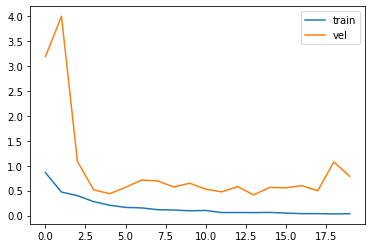

In [13]:
plt.plot(history1.history['loss'], label = 'train')
plt.plot(history1.history['val_loss'], label = 'vel')

plt.legend()
plt.show()

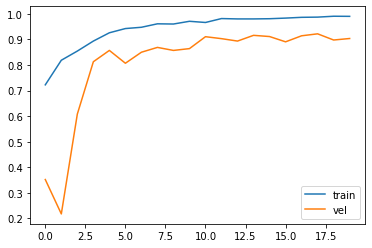

In [14]:
plt.plot(history1.history['categorical_accuracy'], label = 'train')
plt.plot(history1.history['val_categorical_accuracy'], label = 'vel')

plt.legend()
plt.show()

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                        

In [16]:
model1.evaluate(test)

23/23 [==============================] - 222s 10s/step - loss: 0.4371 - categorical_accuracy: 0.9164


[0.4370552897453308, 0.9164305925369263]